In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import warnings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
style.use('seaborn')
sns.set_context('notebook')
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [3]:
deaths = pd.read_csv(url)
deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,3,3,3,3,3
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,2,3,3,4,4,4,6,8,9,13,18,19,23,27,28,36,39,43,44,48,56,63,72,82,83,90,97,102,111,115,123,129,132,136
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,3,3,4,7,7,7,7,8,8,9,10,12,13,13,14,16,17,18,19,20,20,22
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,2,2,2,2,2,4,5,5,6,6,6,6,7,7,7,7,8,8,8,8,9,10,12,12,16,18,21,21,21,22,23,24,25,25,25,25,26,26,26,26


In [4]:
deaths.rename(columns={'Province/State': 'state', 'Country/Region': 'country', 
                            'Lat': 'lat', 'Long': 'long'}, inplace=True)
deaths.head()

,state,country,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


# Select Countries

In [5]:
countries = deaths.loc[(deaths['country'] == 'US') | (deaths['country'] == 'Korea, South')
                | (deaths['country'] == 'Spain') | (deaths['country'] == 'Italy')]
countries

,state,country,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
137,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,7,10,12,17,21,29,34,52,79,107,148,197,233,366,463,631,827,827,1266,1441,1809,2158,2503,2978,3405,4032,4825,5476,6077,6820,7503,8215,9134,10023,10779,11591,12428,13155,13915,14681,15362,15887,16523,17127,17669,18279,18849,19468,19899,20465,21067,21645,22170,22745,23227,23660,24114
143,NaN,"Korea, South",36.0000,128.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,6,8,10,12,13,13,16,17,28,28,35,35,42,44,50,53,54,60,66,66,72,75,75,81,84,91,94,102,111,111,120,126,131,139,144,152,158,162,165,169,174,177,183,186,192,200,204,208,211,214,217,222,225,229,230,232,234,236
201,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,5,10,17,28,35,54,55,133,195,289,342,533,623,830,1043,1375,1772,2311,2808,3647,4365,5138,5982,6803,7716,8464,9387,10348,11198,11947,12641,13341,14045,14792,15447,16081,16606,17209,17756,18056,18708,19315,20002,20043,20453,20852
225,NaN,US,37.0902,-95.7129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6,7,11,12,14,17,21,22,28,36,40,47,54,63,85,108,118,200,244,307,417,557,706,942,1209,1581,2026,2467,2978,3873,4757,5926,7087,8407,9619,10783,12794,14695,16544,18586,20462,22019,23528,25831,28325,32916,36773,38664,40661,42094


In [6]:
countries.drop(['state', 'lat', 'long', 'country'], axis=1, inplace=True)
countries = countries.transpose()
countries.head()

,137,143,201,225
1/22/20,0,0,0,0
1/23/20,0,0,0,0
1/24/20,0,0,0,0
1/25/20,0,0,0,0
1/26/20,0,0,0,0


In [7]:
countries.rename(columns={225: 'usa', 143: 'south_korea', 137: 'italy', 201: 'spain'}, inplace=True)
countries.head()

,italy,south_korea,spain,usa
1/22/20,0,0,0,0
1/23/20,0,0,0,0
1/24/20,0,0,0,0
1/25/20,0,0,0,0
1/26/20,0,0,0,0


# USA

In [8]:
countries['usa'].values

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     1,     1,     6,     7,    11,    12,    14,
          17,    21,    22,    28,    36,    40,    47,    54,    63,
          85,   108,   118,   200,   244,   307,   417,   557,   706,
         942,  1209,  1581,  2026,  2467,  2978,  3873,  4757,  5926,
        7087,  8407,  9619, 10783, 12794, 14695, 16544, 18586, 20462,
       22019, 23528, 25831, 28325, 32916, 36773, 38664, 40661, 42094])

In [9]:
us_trim = np.trim_zeros(np.squeeze(countries['usa']))
us_trim.head()

2/29/20     1
3/1/20      1
3/2/20      6
3/3/20      7
3/4/20     11
Name: usa, dtype: int64

In [10]:
us_trim = np.log(us_trim)
us_trim.head()

2/29/20    0.000000
3/1/20     0.000000
3/2/20     1.791759
3/3/20     1.945910
3/4/20     2.397895
Name: usa, dtype: float64

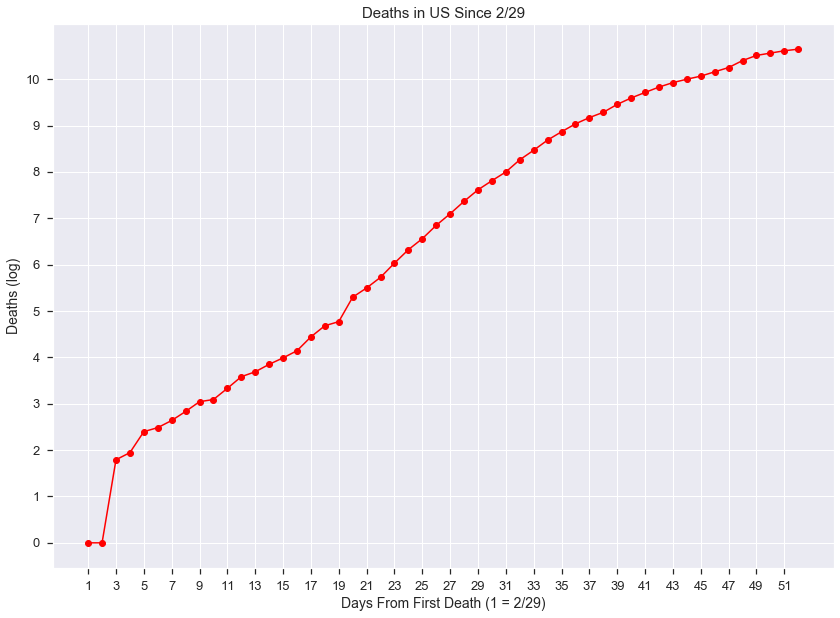

US Deaths (log) values: 

 2/29/20     0.000000
3/1/20      0.000000
3/2/20      1.791759
3/3/20      1.945910
3/4/20      2.397895
3/5/20      2.484907
3/6/20      2.639057
3/7/20      2.833213
3/8/20      3.044522
3/9/20      3.091042
3/10/20     3.332205
3/11/20     3.583519
3/12/20     3.688879
3/13/20     3.850148
3/14/20     3.988984
3/15/20     4.143135
3/16/20     4.442651
3/17/20     4.682131
3/18/20     4.770685
3/19/20     5.298317
3/20/20     5.497168
3/21/20     5.726848
3/22/20     6.033086
3/23/20     6.322565
3/24/20     6.559615
3/25/20     6.848005
3/26/20     7.097549
3/27/20     7.365813
3/28/20     7.613819
3/29/20     7.810758
3/30/20     7.999007
3/31/20     8.261785
4/1/20      8.467372
4/2/20      8.687105
4/3/20      8.866017
4/4/20      9.036820
4/5/20      9.171496
4/6/20      9.285726
4/7/20      9.456732
4/8/20      9.595263
4/9/20      9.713779
4/10/20     9.830164
4/11/20     9.926325
4/12/20     9.999661
4/13/20    10.065946
4/14/20    10.159331
4/15/20

In [11]:
x = np.arange(1, len(us_trim)+1).reshape(-1,1)
fig, ax = plt.subplots(figsize=(14,10))
ax.scatter(x, us_trim, color='red')
ax.plot(x, us_trim, color='red')
ax.set_xlabel('Days From First Death (1 = 2/29)', fontsize=14)
ax.set_ylabel('Deaths (log)', fontsize=14)
ax.set_xticks(np.arange(min(x), max(x)+1, 2))
ax.set_yticks(np.arange(0, max(us_trim), 1))
ax.set_title('Deaths in US Since 2/29', fontsize=15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
plt.savefig('/Users/Grant/Desktop/research/corona/us_deaths.jpeg')
plt.show()
print('US Deaths (log) values: \n\n', us_trim)

# South Korea

In [12]:
countries['south_korea'].values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   1,   2,   2,   6,   8,  10,  12,  13,  13,  16,
        17,  28,  28,  35,  35,  42,  44,  50,  53,  54,  60,  66,  66,
        72,  75,  75,  81,  84,  91,  94, 102, 111, 111, 120, 126, 131,
       139, 144, 152, 158, 162, 165, 169, 174, 177, 183, 186, 192, 200,
       204, 208, 211, 214, 217, 222, 225, 229, 230, 232, 234, 236])

In [13]:
sk_trim = np.trim_zeros(np.squeeze(countries['south_korea']))
sk_trim.head()

2/20/20    1
2/21/20    2
2/22/20    2
2/23/20    6
2/24/20    8
Name: south_korea, dtype: int64

In [14]:
sk_trim = np.log(sk_trim)
sk_trim.head()

2/20/20    0.000000
2/21/20    0.693147
2/22/20    0.693147
2/23/20    1.791759
2/24/20    2.079442
Name: south_korea, dtype: float64

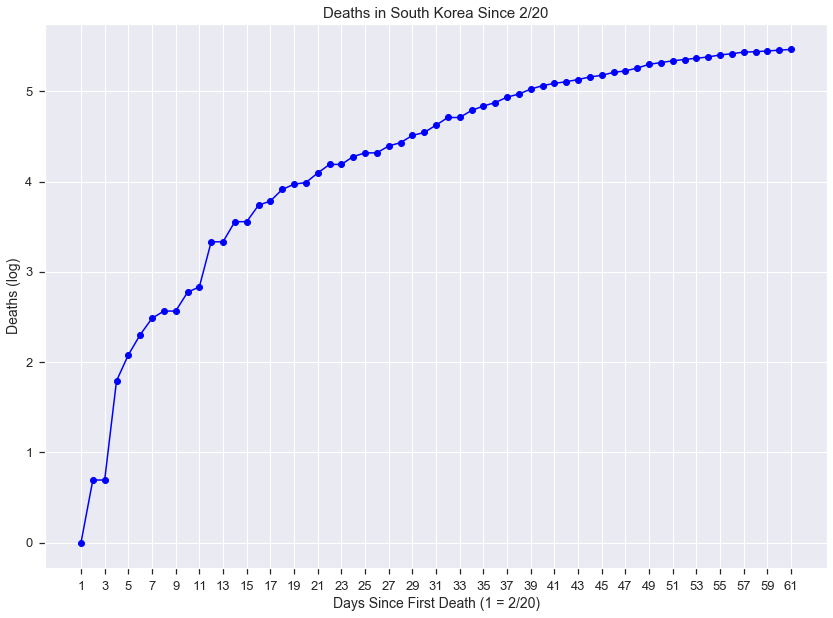

South Korea Deaths (log) values: 

 2/20/20    0.000000
2/21/20    0.693147
2/22/20    0.693147
2/23/20    1.791759
2/24/20    2.079442
2/25/20    2.302585
2/26/20    2.484907
2/27/20    2.564949
2/28/20    2.564949
2/29/20    2.772589
3/1/20     2.833213
3/2/20     3.332205
3/3/20     3.332205
3/4/20     3.555348
3/5/20     3.555348
3/6/20     3.737670
3/7/20     3.784190
3/8/20     3.912023
3/9/20     3.970292
3/10/20    3.988984
3/11/20    4.094345
3/12/20    4.189655
3/13/20    4.189655
3/14/20    4.276666
3/15/20    4.317488
3/16/20    4.317488
3/17/20    4.394449
3/18/20    4.430817
3/19/20    4.510860
3/20/20    4.543295
3/21/20    4.624973
3/22/20    4.709530
3/23/20    4.709530
3/24/20    4.787492
3/25/20    4.836282
3/26/20    4.875197
3/27/20    4.934474
3/28/20    4.969813
3/29/20    5.023881
3/30/20    5.062595
3/31/20    5.087596
4/1/20     5.105945
4/2/20     5.129899
4/3/20     5.159055
4/4/20     5.176150
4/5/20     5.209486
4/6/20     5.225747
4/7/20     5.257495
4/8/

In [15]:
x = np.arange(1, len(sk_trim)+1).reshape(-1,1)
fig, ax = plt.subplots(figsize=(14,10))
ax.scatter(x, sk_trim, color='blue')
ax.plot(x, sk_trim, color='blue')
ax.set_xlabel('Days Since First Death (1 = 2/20)', fontsize=14)
ax.set_ylabel('Deaths (log)', fontsize=14)
ax.set_xticks(np.arange(min(x), max(x)+1, 2))
#ax.set_yticks(np.arange(1, max(us_trim), 2))
ax.set_title('Deaths in South Korea Since 2/20', fontsize=15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
plt.savefig('/Users/Grant/Desktop/research/corona/sk_deaths.jpeg')
plt.show()
print('South Korea Deaths (log) values: \n\n', sk_trim)

# Spain

In [16]:
countries['spain'].values

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     1,     2,     3,     5,
          10,    17,    28,    35,    54,    55,   133,   195,   289,
         342,   533,   623,   830,  1043,  1375,  1772,  2311,  2808,
        3647,  4365,  5138,  5982,  6803,  7716,  8464,  9387, 10348,
       11198, 11947, 12641, 13341, 14045, 14792, 15447, 16081, 16606,
       17209, 17756, 18056, 18708, 19315, 20002, 20043, 20453, 20852])

In [17]:
spain_trim = np.trim_zeros(np.squeeze(countries['spain']))
spain_trim = np.log(spain_trim)
spain_trim.head()

3/3/20    0.000000
3/4/20    0.693147
3/5/20    1.098612
3/6/20    1.609438
3/7/20    2.302585
Name: spain, dtype: float64

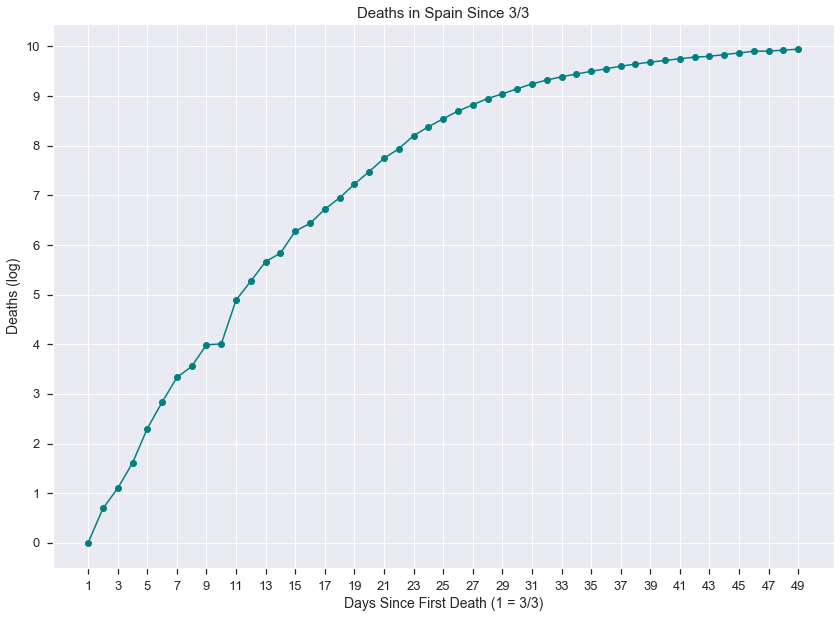

Spain Deaths (log) values: 

 3/3/20     0.000000
3/4/20     0.693147
3/5/20     1.098612
3/6/20     1.609438
3/7/20     2.302585
3/8/20     2.833213
3/9/20     3.332205
3/10/20    3.555348
3/11/20    3.988984
3/12/20    4.007333
3/13/20    4.890349
3/14/20    5.273000
3/15/20    5.666427
3/16/20    5.834811
3/17/20    6.278521
3/18/20    6.434547
3/19/20    6.721426
3/20/20    6.949856
3/21/20    7.226209
3/22/20    7.479864
3/23/20    7.745436
3/24/20    7.940228
3/25/20    8.201660
3/26/20    8.381373
3/27/20    8.544419
3/28/20    8.696510
3/29/20    8.825119
3/30/20    8.951051
3/31/20    9.043577
4/1/20     9.147081
4/2/20     9.244549
4/3/20     9.323490
4/4/20     9.388235
4/5/20     9.444701
4/6/20     9.498597
4/7/20     9.550022
4/8/20     9.601842
4/9/20     9.645170
4/10/20    9.685394
4/11/20    9.717519
4/12/20    9.753188
4/13/20    9.784479
4/14/20    9.801233
4/15/20    9.836707
4/16/20    9.868637
4/17/20    9.903588
4/18/20    9.905635
4/19/20    9.925885
4/20/20   

In [18]:
x = np.arange(1, len(spain_trim)+1).reshape(-1,1)
fig, ax = plt.subplots(figsize=(14,10))
ax.scatter(x, spain_trim, color='teal')
ax.plot(x, spain_trim, color='teal')
ax.set_xlabel('Days Since First Death (1 = 3/3)', fontsize=14)
ax.set_ylabel('Deaths (log)', fontsize=14)
ax.set_xticks(np.arange(min(x), max(x)+1, 2))
ax.set_yticks(np.arange(0, max(us_trim), 1))
ax.set_title('Deaths in Spain Since 3/3', fontsize=15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
plt.savefig('/Users/Grant/Desktop/research/corona/spain_deaths.jpeg')
plt.show()
print('Spain Deaths (log) values: \n\n', spain_trim)

# Italy

In [19]:
countries['italy'].values

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     1,     2,     3,     7,    10,    12,
          17,    21,    29,    34,    52,    79,   107,   148,   197,
         233,   366,   463,   631,   827,   827,  1266,  1441,  1809,
        2158,  2503,  2978,  3405,  4032,  4825,  5476,  6077,  6820,
        7503,  8215,  9134, 10023, 10779, 11591, 12428, 13155, 13915,
       14681, 15362, 15887, 16523, 17127, 17669, 18279, 18849, 19468,
       19899, 20465, 21067, 21645, 22170, 22745, 23227, 23660, 24114])

In [20]:
italy_trim = np.trim_zeros(np.squeeze(countries['italy']))
italy_trim = np.log(italy_trim)
italy_trim.head()

2/21/20    0.000000
2/22/20    0.693147
2/23/20    1.098612
2/24/20    1.945910
2/25/20    2.302585
Name: italy, dtype: float64

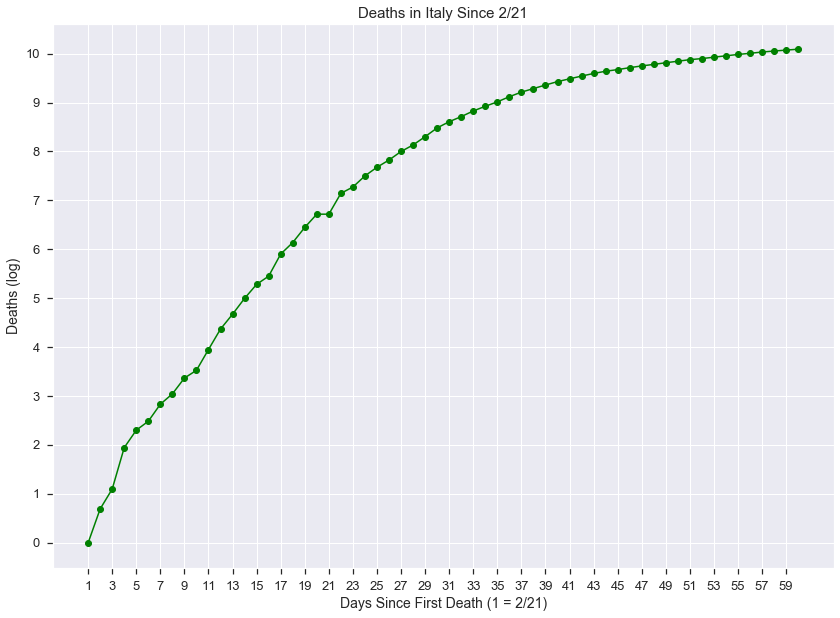

Italy Deaths (log) values: 

 2/21/20     0.000000
2/22/20     0.693147
2/23/20     1.098612
2/24/20     1.945910
2/25/20     2.302585
2/26/20     2.484907
2/27/20     2.833213
2/28/20     3.044522
2/29/20     3.367296
3/1/20      3.526361
3/2/20      3.951244
3/3/20      4.369448
3/4/20      4.672829
3/5/20      4.997212
3/6/20      5.283204
3/7/20      5.451038
3/8/20      5.902633
3/9/20      6.137727
3/10/20     6.447306
3/11/20     6.717805
3/12/20     6.717805
3/13/20     7.143618
3/14/20     7.273093
3/15/20     7.500529
3/16/20     7.676937
3/17/20     7.825245
3/18/20     7.999007
3/19/20     8.133000
3/20/20     8.302018
3/21/20     8.481566
3/22/20     8.608130
3/23/20     8.712266
3/24/20     8.827615
3/25/20     8.923058
3/26/20     9.013717
3/27/20     9.119759
3/28/20     9.212638
3/29/20     9.285355
3/30/20     9.357984
3/31/20     9.427707
4/1/20      9.484557
4/2/20      9.540723
4/3/20      9.594309
4/4/20      9.639652
4/5/20      9.673256
4/6/20      9.712509
4/7/

In [21]:
x = np.arange(1, len(italy_trim)+1).reshape(-1,1)
fig, ax = plt.subplots(figsize=(14,10))
ax.scatter(x, italy_trim, color='green')
ax.plot(x, italy_trim, color='green')
ax.set_xlabel('Days Since First Death (1 = 2/21)', fontsize=14)
ax.set_ylabel('Deaths (log)', fontsize=14)
ax.set_xticks(np.arange(min(x), max(x)+1, 2))
ax.set_yticks(np.arange(0, max(us_trim), 1))
ax.set_title('Deaths in Italy Since 2/21', fontsize=15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
plt.savefig('/Users/Grant/Desktop/research/corona/italy_deaths.jpeg')
plt.show()
print('Italy Deaths (log) values: \n\n', italy_trim)

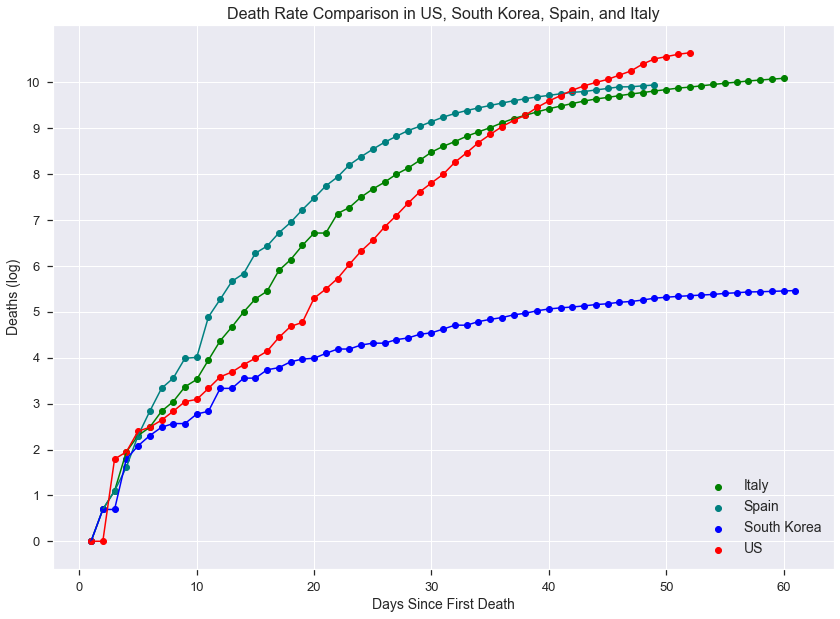

In [22]:
x_i = np.arange(1, len(italy_trim)+1).reshape(-1,1)
x_s = np.arange(1, len(spain_trim)+1).reshape(-1,1)
x_us = np.arange(1, len(us_trim)+1).reshape(-1,1)
x_sk = np.arange(1, len(sk_trim)+1).reshape(-1,1)
fig, ax = plt.subplots(figsize=(14,10))
ax.scatter(x_i, italy_trim, color='green', label='Italy')
ax.plot(x_i, italy_trim, color='green')
ax.scatter(x_s, spain_trim, color='teal', label='Spain')
ax.plot(x_s, spain_trim, color='teal')
ax.scatter(x_sk, sk_trim, color='blue', label='South Korea')
ax.plot(x_sk, sk_trim, color='blue')
ax.scatter(x_us, us_trim, color='red', label='US')
ax.plot(x_us, us_trim, color='red')
ax.set_xlabel('Days Since First Death', fontsize=14)
ax.set_ylabel('Deaths (log)', fontsize=14)
#ax.set_xticks(np.arange(min(x), max(x)+1, 2))
ax.set_yticks(np.arange(0, 11, 1))
ax.set_title('Death Rate Comparison in US, South Korea, Spain, and Italy', fontsize=16)
ax.legend(loc='lower right', prop={'size': 14})
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
plt.savefig('/Users/Grant/Desktop/research/corona/deaths.jpeg')
plt.show()